In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import matplotlib as mpl



In [ ]:
import piplite
await piplite.install(['pandas', 'numpy', 'seaborn', 'matplotlib', 'scikit-learn', 'scipy'])

In [1]:
#delete
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [2]:
data= pd.read_csv('Pricing Push Ups data.csv')
print("The first 5 rows of the data") 
data.head()## original data set


The first 5 rows of the data


,category_2,category_3,number_of_listings,avg_listing_price_eur,revenue_from_push_ups
0,ACCESSORIES_JEWELLERY,ACCESS_MOBILE,14228,28.081851,492.0
1,ACCESSORIES_JEWELLERY,BELTS,29838,21.273161,1382.0
2,ACCESSORIES_JEWELLERY,GLOVES,6350,17.043860,304.0
3,ACCESSORIES_JEWELLERY,JEWELRY,343493,17.935880,20554.0
4,ACCESSORIES_JEWELLERY,KEY_RINGS,5,15.900000,NaN


In [3]:
data.count()

category_2               237
category_3               230
number_of_listings       238
avg_listing_price_eur    238
revenue_from_push_ups    223
dtype: int64

In [4]:
df= data #data frame for data exploratory analysis


We can find more information about the features and types using the info() and describe() methods.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category_2             237 non-null    object 
 1   category_3             230 non-null    object 
 2   number_of_listings     238 non-null    int64  
 3   avg_listing_price_eur  238 non-null    float64
 4   revenue_from_push_ups  223 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.5+ KB


In [6]:
data.describe()

,number_of_listings,avg_listing_price_eur,revenue_from_push_ups
count,2.380000e+02,238.000000,223.000000
mean,5.858680e+04,34.103754,4008.708520
std,1.565780e+05,40.741338,10131.364522
min,1.000000e+00,3.500000,2.000000
25%,1.669250e+03,11.835471,125.000000
50%,6.328500e+03,21.288226,498.000000
75%,3.833075e+04,44.381888,3215.000000
max,1.844512e+06,329.733729,79424.000000


We can see we have missing values for the columns category_2 and category_3 and revenue_from_push_ups.
For categorical columns let's place null with "Other" and for numerical column replace NULL with 0

In [7]:
df['revenue_from_push_ups'].replace(np.nan,0, inplace=True)
df['category_2'].replace(np.nan,'Other', inplace=True)
df['category_3'].replace(np.nan,'Other', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category_2             238 non-null    object 
 1   category_3             238 non-null    object 
 2   number_of_listings     238 non-null    int64  
 3   avg_listing_price_eur  238 non-null    float64
 4   revenue_from_push_ups  238 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.5+ KB


Now we do not have missing values and could start data analysis

Section I: Evaluate current situation

(A) Based on the provided data, what metric can you define to check if users are interested
in this feature and why? Calculate this metric. Which categories perform the best
according to this metric?

We could calculate several additional metrics to see if "push ups" are profitable and add to our data frame.

In [8]:
# Revenue per Listing. This metric helps us understand how profitable "push ups" notifications are
df['revenue_per_listing'] = df['revenue_from_push_ups']/df['number_of_listings']
#Average Revenue per Listing Price.This metric helps understand how "push ups" generate revenues compared with amount paid to listers. 
df['revenue_per_listing_price'] = df['revenue_from_push_ups'] / df['avg_listing_price_eur']

In [10]:
df.head()

,category_2,category_3,number_of_listings,avg_listing_price_eur,revenue_from_push_ups,revenue_per_listing,revenue_per_listing_price
0,ACCESSORIES_JEWELLERY,ACCESS_MOBILE,14228,28.081851,492.0,0.034580,17.520212
1,ACCESSORIES_JEWELLERY,BELTS,29838,21.273161,1382.0,0.046317,64.964486
2,ACCESSORIES_JEWELLERY,GLOVES,6350,17.043860,304.0,0.047874,17.836335
3,ACCESSORIES_JEWELLERY,JEWELRY,343493,17.935880,20554.0,0.059838,1145.971092
4,ACCESSORIES_JEWELLERY,KEY_RINGS,5,15.900000,0.0,0.000000,0.000000


In [ ]:
Lets look which categories generates the most revenues from "push ups"

In [9]:
#total_listings = df['number_of_listings'].sum()
#total_listings = df['number_of_listings'].sum()
revenue_per_category = df.groupby(['category_2', 'category_3'])['revenue_from_push_ups'].sum().reset_index()
revenue_per_category.sort_values('revenue_from_push_ups',ascending=False).head(10)

,category_2,category_3,revenue_from_push_ups
222,WOMENS,DRESSES,79424.0
234,WOMENS,TOPS_T_SHIRTS,76166.0
227,WOMENS,OUTERWEAR,57032.0
228,WOMENS,PULLOVERS_SWEATERS,47128.0
105,FOOTWEAR,W_TRAINERS,43358.0
223,WOMENS,JEANS,25316.0
221,WOMENS,COATS_JACKETS,25214.0
230,WOMENS,SKIRTS,23660.0
39,BAGS_BACKPACKS,HANDBAGS,23136.0
95,FOOTWEAR,HIGH_HEELS,23110.0


We see that on tops is clothes for women. So lets look of the same categories are the most profitable either

In [33]:
revenue_per_category2 = df.groupby(['category_2'])['revenue_per_listing_price'].sum().reset_index()
revenue_per_category2.sort_values('revenue_per_listing_price',ascending=False).head()


,category_2,revenue_per_listing_price
35,WOMENS,21729.164836
13,GIRLS_CLOTHING,8454.288165
8,CLOTHING_FOR_BOYS,6905.621282
12,FOOTWEAR,3494.812490
0,ACCESSORIES_JEWELLERY,2256.586728


In [11]:
revenue_per_category = df.groupby(['category_2', 'category_3'])['revenue_per_listing_price'].sum().reset_index()
revenue_per_category.sort_values('revenue_per_listing_price',ascending=False).head(10)

,category_2,category_3,revenue_per_listing_price
234,WOMENS,TOPS_T_SHIRTS,7274.718339
228,WOMENS,PULLOVERS_SWEATERS,3247.343261
222,WOMENS,DRESSES,1996.392060
230,WOMENS,SKIRTS,1787.109893
223,WOMENS,JEANS,1314.041717
235,WOMENS,TROUSERS,1244.295556
227,WOMENS,OUTERWEAR,1222.862010
3,ACCESSORIES_JEWELLERY,JEWELRY,1145.971092
118,GIRLS_CLOTHING,OUTDOOR_CLOTHES,1144.893826
89,COSMETICS_AND_BEAUTY_PRODUCTS,WOM_COS_MAK_COSMETICS,1097.829934


On top women's clothers appears also but we some different categories than just looking in total revenue from "push ups" 

(B) Define a metric that – apart from category – shows a strong correlation with the metric
you have found in the previous question. Discuss the relationship between both metrics
using a graph.

Lets find correlations between metrics. From previous question "revenue_per_listing_price" is the metric we need to compare with others

In [12]:
corr_matrix = df.corr()
print(corr_matrix)

<ipython-input-12-ed094f514566>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


                           number_of_listings  avg_listing_price_eur  \
number_of_listings                   1.000000              -0.113662   
avg_listing_price_eur               -0.113662               1.000000   
revenue_from_push_ups                0.872825              -0.022723   
revenue_per_listing                 -0.033527               0.526065   
revenue_per_listing_price            0.979273              -0.137472   

                           revenue_from_push_ups  revenue_per_listing  \
number_of_listings                      0.872825            -0.033527   
avg_listing_price_eur                  -0.022723             0.526065   
revenue_from_push_ups                   1.000000             0.138478   
revenue_per_listing                     0.138478             1.000000   
revenue_per_listing_price               0.816451            -0.049514   

                           revenue_per_listing_price  
number_of_listings                          0.979273  
avg_listing_price_

The strongest correlations are between "revenue_per_listing_price" and "number_of_listings" (0.979273) and 
between "revenue_per_listing_price" and "revenue_from_push_ups" (0.816451). Which is logical because they are related with formula


In [14]:
import piplite
await piplite.install(['seaborn'])

In [15]:
import seaborn as sns 

<AxesSubplot:xlabel='revenue_from_push_ups', ylabel='revenue_per_listing_price'>

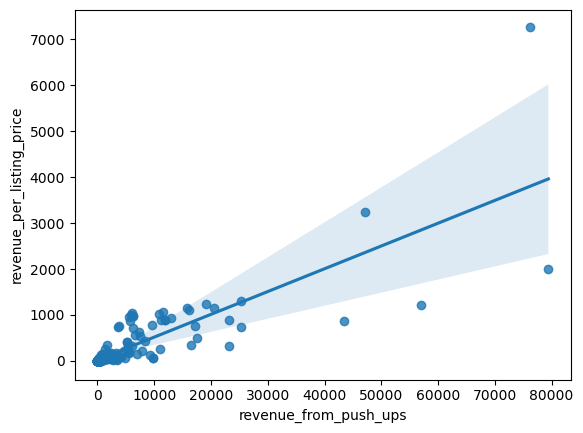

In [16]:
sns.regplot(x='revenue_from_push_ups',y='revenue_per_listing_price', data=df)

We see strong correlation from plot also

<AxesSubplot:xlabel='number_of_listings', ylabel='revenue_per_listing_price'>

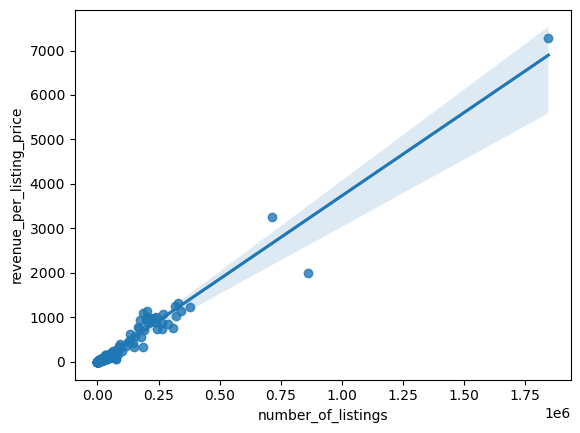

In [17]:
sns.regplot(x='number_of_listings',y='revenue_per_listing_price', data=df)

We see strong correlation from plot also

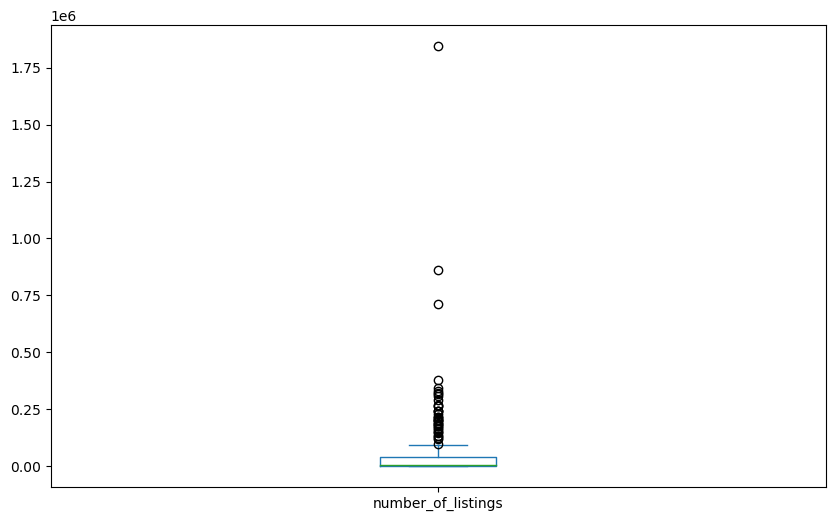

<class 'NameError'>: name 'plt' is not defined

In [19]:
df_number_of_listings = df[['number_of_listings']]
df_number_of_listings.plot(kind='box', figsize=(10, 10))
plt.title('Variable of number of listings distribution')
plt.show()
 df_can.plot(kind='box')

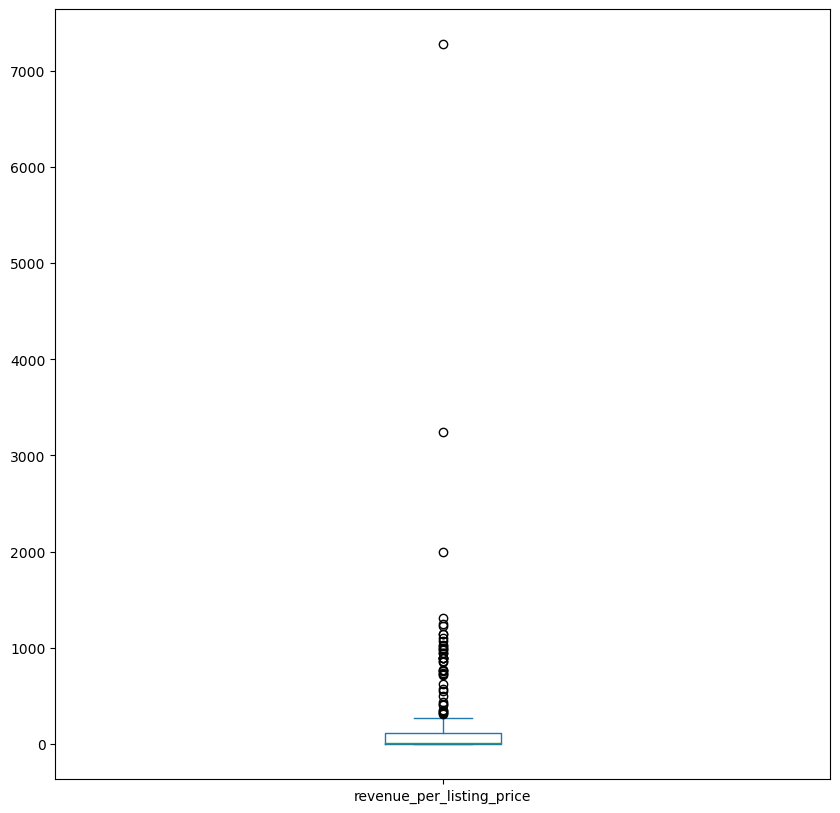

<class 'NameError'>: name 'plt' is not defined

In [23]:
df_revenue_per_listing_price = df[['revenue_per_listing_price']]
df_revenue_per_listing_price.plot(kind='box', figsize=(10, 10))
plt.title('Revenue per listing price distribution')


<AxesSubplot:xlabel='category_2', ylabel='revenue_per_listing_price'>

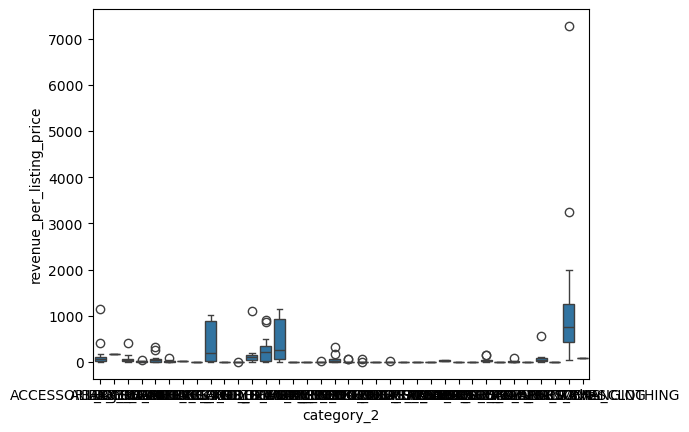

In [22]:
sns.boxplot(x=df['category_2'],y='revenue_per_listing_price',data=df)

!!!!Due to lack of time I didn't look into more graphics. Now we could see that revenue of pushs ups, avg_listings, revenue_per_listing_price are very distributed per categories and have a lot outliers. So we need to look into boxplots for each category

(C) Explain without additional calculations how the push up feature is performing in your
opinion. Is there room for improvement? Why (not)?

From the data we could see there are some categories which generate big amounts of revenues from "push ups" (womens clothes). Looks like it helps to  sell more expensive items. We could adapt "push ups" price according to the price of items. If "push ups" price is 50% of item price it is logic not to use this feature

(D) In the GIRLS_CLOTHING / FOR_BABIES category, the price of the push up feature is
more than half of the average listing price. However, there are still sellers willing to pay
for the feature. Why do you think this is the case?

Most sellers of this categories are women (which geberate the biggest revenues and items are the most expensive. Usually when you are looking for some items in Vinted and decide to buy from specific seller you look through all items in profile and maybe you will decide to get more items from another category (GIRLS_CLOTHING / FOR_BABIES). It would be cheaper because of transportations costs and you could get a discount of buyeing more than one item.
Another reason could be that sellers from this category have a lot of items since babies are growing up very fast. So seller could invest into a fwe items but sell much more (users will look into other items of sellers)

Section II: Analyse alternative strategies

(A) Your colleague suggests setting a fixed price for the “push up” feature different from €2.
What implications will a price increase / decrease have on the business, e.g. visibility of
listing on the platform?

Firstly discuss from market perspective.
A. If "push ups" price would increase:
    1. Revenue impact: higher proce will increase revenue per user but it could decrease number of users
    2. User engagment: users who use this feature are likely more engaged and they will still use it but some users might be priced out of using the feature
, leading to decreased overall engagement and dissatisfaction among price-sensitive users.
B. If price would decrease
    1. Revenue impact:lower prices can attract more users to purchase the feature, potentially increasing the total revenue if the increased volume offsets the lower price.But lower price will generate less revenue if users amount won't be sufficient.
    2. User engagment: More users might be able to afford and use the feature, leading to increased engagement and satisfaction across a broader user base. But also there could be quality issues if too many listings are promotedS

We need to do A/B testing here.


In [26]:
df.head()

,category_2,category_3,number_of_listings,avg_listing_price_eur,revenue_from_push_ups,revenue_per_listing,revenue_per_listing_price
0,ACCESSORIES_JEWELLERY,ACCESS_MOBILE,14228,28.081851,492.0,0.034580,17.520212
1,ACCESSORIES_JEWELLERY,BELTS,29838,21.273161,1382.0,0.046317,64.964486
2,ACCESSORIES_JEWELLERY,GLOVES,6350,17.043860,304.0,0.047874,17.836335
3,ACCESSORIES_JEWELLERY,JEWELRY,343493,17.935880,20554.0,0.059838,1145.971092
4,ACCESSORIES_JEWELLERY,KEY_RINGS,5,15.900000,0.0,0.000000,0.000000


In [ ]:
lets calculate how we have revenue

In [46]:
df['revenue_from_listings'] = df['number_of_listings'] * df['avg_listing_price_eur']
total_revenue_from_listings=df['revenue_from_listings'].sum()
total_revenue_from_push_ups=df['revenue_from_push_ups'].sum()
listings_with_push_ups_engagement = (total_revenue_from_push_ups / total_revenue_from_listings) *100
print("Total revenue: ", total_revenue_from_listings)
print("Revenue from push ups: ",total_revenue_from_push_ups)
print("Push ups rate: ", listings_with_push_ups_engagement)
#listings_with_push_ups = df[df['revenue_from_push_ups'] > 0]['number_of_listings'].sum()
#total_listings = df['number_of_listings'].sum()
#listings_with_push_ups_engagement = (listings_with_push_ups / total_listings) * 100 ## very big percentage

Total revenue:  303689053.2399223
Revenue from push ups:  893942.0
Push ups rate:  0.29436095587342836


In [40]:
df['price'] =2
df.head()

,category_2,category_3,number_of_listings,avg_listing_price_eur,revenue_from_push_ups,revenue_per_listing,revenue_per_listing_price,revenue_from_listingss,revenue_from_listings,price
0,ACCESSORIES_JEWELLERY,ACCESS_MOBILE,14228,28.081851,492.0,0.034580,17.520212,3.995486e+05,3.995486e+05,2
1,ACCESSORIES_JEWELLERY,BELTS,29838,21.273161,1382.0,0.046317,64.964486,6.347486e+05,6.347486e+05,2
2,ACCESSORIES_JEWELLERY,GLOVES,6350,17.043860,304.0,0.047874,17.836335,1.082285e+05,1.082285e+05,2
3,ACCESSORIES_JEWELLERY,JEWELRY,343493,17.935880,20554.0,0.059838,1145.971092,6.160849e+06,6.160849e+06,2
4,ACCESSORIES_JEWELLERY,KEY_RINGS,5,15.900000,0.0,0.000000,0.000000,7.950000e+01,7.950000e+01,2


We need to figure out if we increase price to 3 euro will the total revenue also increase?
I would split the data into two datasets randomly" for one sample price would be 2 for another 3 (multiply by 1,33 revenue_from_push_ups).
H0 (null hypothesis) would be mean_2<>mean_3, H1 (alternative) hypothesis would be mean_2=mean_3
Also we could the same with 1 and euros price.
S

(B) Another colleague proposes to implement a dynamic pricing strategy, that is, make the
feature price relative to the average listing price. Calculate the relative feature price
percentage that maximises the push up revenue. Given this percentage, what is the
expected revenue and is this an improvement over the current strategy?
We expect analytical depth in your answer here. Please leverage the data that is
available to come to a data-driven estimation of the revenue improvement.

We need to create some statistical models here (linear regression could be an option). I didn't develope due to lack of time :(

(C) What do you think are the uncertainties in your analysis of the dynamic pricing strategy?

Section III: Next steps

(A) Before fully scaling dynamic pricing of push-ups, what should we do first?

More analysis per category, A/B testing per category, statistical models per category

(B) If you had to restrict the original "push up" feature (i.e. fixed 2EUR pricing) to one
low-level category on the platform, which one would it be and why?

(C) How would you increase the number of users that are using the "push up" feature?

Price depends of  list user have and the price of item.